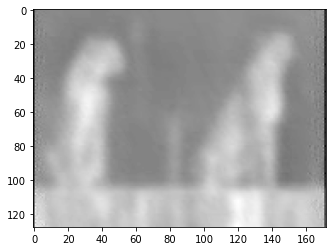

In [7]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('2.jpg', cv2.IMREAD_GRAYSCALE)

# Вычисление гистограммы изображения
hist = np.zeros(256, dtype=int)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        intensity = image[i, j]
        hist[intensity] += 1

# Вычисление кумулятивной гистограммы
cumulative_hist = np.zeros(256, dtype=int)
cumulative_hist[0] = hist[0]
for i in range(1, 256):
    cumulative_hist[i] = cumulative_hist[i - 1] + hist[i]

# Нахождение минимального ненулевого значения в кумулятивной гистограмме
min_cumulative_hist = min(cumulative_hist[cumulative_hist > 0])

# Преобразование значений интенсивности
M, N = image.shape
equalized_image = np.zeros((M, N), dtype=np.uint8)
for i in range(M):
    for j in range(N):
        intensity = image[i, j]
        equalized_intensity = ((cumulative_hist[intensity] - min_cumulative_hist) / (M * N - min_cumulative_hist)) * 255
        equalized_image[i, j] = equalized_intensity

# Сохранение результата
cv2.imwrite('equalized_image.jpg', equalized_image)
plt.imshow(image,cmap="gray")
plt.show()

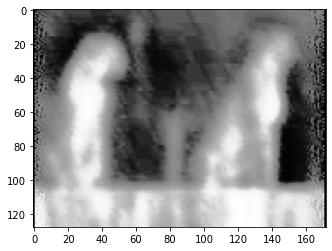

In [8]:
plt.imshow(equalized_image, cmap="gray")
plt.show()
